In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import wilcoxon

In [73]:
def process_results(df):
    df[['statistical_parity', 'equal_opportunity', 'average_odds']] = df[['statistical_parity', 'equal_opportunity', 'average_odds']].abs()
    grouped = df.groupby(['variable', 'fold']).agg('mean').reset_index()
    return grouped

In [74]:
os.makedirs('grouped', exist_ok=True)
for file in os.listdir('results'):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join('results', file), index_col=0)
        grouped_df = process_results(df)
        grouped_df.to_csv(f"results/{file}")
        print(f"Processed {file}:")
        print(grouped_df.head())

Processed transformed_adult_sex_category_flip_xgb.csv:
  variable  fold  statistical_parity  equal_opportunity  average_odds
0      age     0            0.131183           0.083794      0.163269
1      age     1            0.155205           0.082770      0.144902
2      age     2            0.133867           0.078817      0.150213
3      age     3            0.148673           0.095588      0.154339
4      age     4            0.154470           0.103462      0.154318
Processed adult_xgb.csv:
  variable  fold  statistical_parity  equal_opportunity  average_odds
0      age     0            0.124035           0.087782      0.163880
1      age     1            0.153365           0.082004      0.140176
2      age     2            0.140396           0.077966      0.155809
3      age     3            0.149625           0.094558      0.152647
4      age     4            0.157795           0.099752      0.153860
Processed transformed_adult_race_category_flip_xgb.csv:
  variable  fold  statis

In [75]:
def make_plot(age_trans, base_age, feature_name, model_name):
  fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

  sns.boxplot(data=age_trans[['statistical_parity', 'equal_opportunity', 'average_odds']], ax=ax[0])
  sns.boxplot(data=base_age[['statistical_parity', 'equal_opportunity', 'average_odds']], ax=ax[1])
  ax[0].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])
  ax[1].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])
  ax[0].set_title(f'Transformed feature')
  ax[1].set_title('Base Dataset')
  plt.savefig(f'imgs/{feature_name}_{model_name}_feature.pdf', bbox_inches='tight')
  plt.show()

In [76]:
def wilcoxon_test(base_age, age, feature_name, model_name):
    stats_two_sided = pd.DataFrame()
    stats_greater = pd.DataFrame()
    os.makedirs('stats_two_sided', exist_ok=True)
    os.makedirs('stats_greater', exist_ok=True)
    for metric in ['statistical_parity', 'equal_opportunity', 'average_odds']:
        print(f"Wilcoxon test for {metric}:")
        test_two_sided = wilcoxon(base_age[metric], age[metric], alternative='two-sided')
        test_two_sided['metric'] = metric
        stats_two_sided = pd.concat([stats_two_sided, test_two_sided], ignore_index=True)

        test_greater = wilcoxon(base_age[metric], age[metric], alternative='less')
        test_greater['metric'] = metric
        stats_greater = pd.concat([stats_greater, test_greater], ignore_index=True)

    stats_two_sided[['p-val', 'CLES', 'metric']].to_csv(f'stats_two_sided/{feature_name}_{model_name}_wilcoxon.csv', index=False)
    stats_greater[['p-val', 'CLES', 'metric']].to_csv(f'stats_greater/{feature_name}_{model_name}_wilcoxon.csv', index=False)

In [77]:
base_results = ['adult_rf.csv', 'adult_xgb.csv']

for ris in os.listdir('results'):
    if ris in base_results:
        continue
    df = pd.read_csv(os.path.join('results', ris), index_col=0)
    if '_rf' in ris:
        model = 'rf'
        base = pd.read_csv('results/adult_rf.csv', index_col=0)
    else:
        model = 'xgb'
        base = pd.read_csv('results/adult_xgb.csv', index_col=0)
    
    feature = ris.split('_')[2]
    print(f"Analyzing feature: {feature}")
    df = df[df['variable'] == feature]
    base = base[base['variable'] == feature]
    # make_plot(df, base, feature, model)
    wilcoxon_test(base, df, feature, model)


Analyzing feature: sex
Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:
Analyzing feature: race
Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:
Analyzing feature: age
Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:
Analyzing feature: hours.per.week
Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:
Analyzing feature: native.country
Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:
Analyzing feature: hours.per.week
Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:
Analyzing feature: age
Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:
Analyzing feature: race
Wilcoxon test for statistical_pa

In [2]:
adult_rf = pd.read_csv('results/adult_rf.csv', index_col=0)

/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_72038/2099124504.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'age'),
 Text(1, 0, 'education'),
 Text(2, 0, 'hours.per.week'),
 Text(3, 0, 'marital.status'),
 Text(4, 0, 'native.country'),
 Text(5, 0, 'occupation'),
 Text(6, 0, 'race'),
 Text(7, 0, 'relationship'),
 Text(8, 0, 'sex'),
 Text(9, 0, 'workclass')]

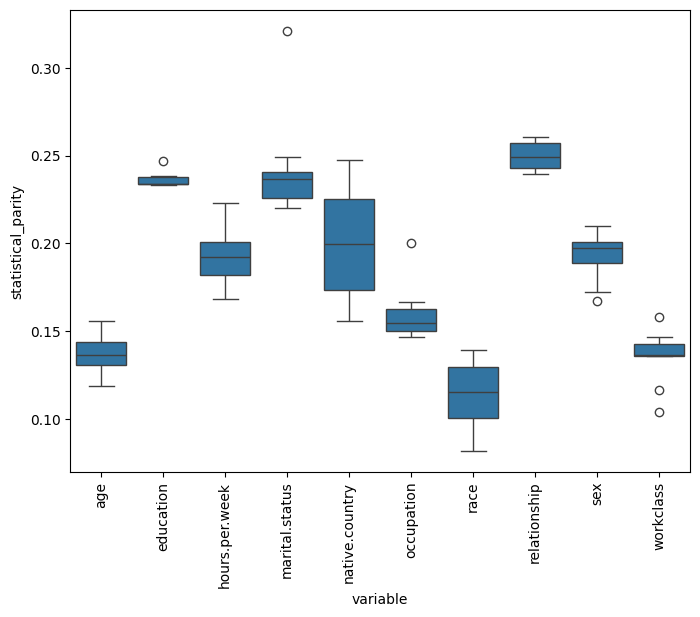

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(y=adult_rf['statistical_parity'], x=adult_rf['variable'], ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## Table setup

In [13]:
full_table = pd.DataFrame()

for stats in os.listdir('stats_two_sided'):
    if 'rf_' in stats:
        df_stats = pd.read_csv(os.path.join('stats_two_sided', stats))
        feature = stats.split('_')[0]
        df_stats = df_stats.pivot_table(columns='metric', values='p-val')
        df_stats['feature'] = feature
        full_table = pd.concat([full_table, df_stats], axis=0)


In [17]:
full_table.columns = ['AOD', 'EOD', 'SP', 'Feature']

In [18]:
full_table = full_table[['Feature', 'SP', 'AOD', 'EOD']]

In [20]:
full_table.to_latex('table_rf.tex', index=False, float_format="%.3f")

In [21]:
full_table = pd.DataFrame()

for stats in os.listdir('stats_two_sided'):
    if 'xgb_' in stats:
        df_stats = pd.read_csv(os.path.join('stats_two_sided', stats))
        feature = stats.split('_')[0]
        df_stats = df_stats.pivot_table(columns='metric', values='p-val')
        df_stats['feature'] = feature
        full_table = pd.concat([full_table, df_stats], axis=0)

full_table.columns = ['AOD', 'EOD', 'SP', 'Feature']
full_table = full_table[['Feature', 'SP', 'AOD', 'EOD']]
full_table.to_latex('table_xgb.tex', index=False, float_format="%.3f")